In [50]:
#import TensorFlow into Colab
#import TensorFlow 2.8 
#make sure we are using a GPU
import tensorflow as tf
print("TF version:", tf.__version__)

TF version: 2.8.0


In [51]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam

In [248]:
from tensorflow.keras.metrics import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras import layers

In [144]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [132]:
os.chdir('../Dataset')

In [133]:
os. getcwd() 

'/Users/mclean/Documents/Exercise_Files/Dataset'

In [70]:
folders = os.listdir()

['valid', 'test', 'covid-19', 'train', 'normal']


In [103]:
os.getcwd()
path1 = ('/Users/mclean/Documents/Exercise_Files/DMV_Dataset/covid-19')
path2 = ('/Users/mclean/Documents/Exercise_Files/DMV_Dataset/normal')

In [108]:
#file_list = glob.glob('normal/*.*')
#for image in os.listdir(path):
#    print(image)
#count = len(os.listdir(path))
#print(count)
#!pip install split-folders


In [114]:
import splitfolders  # or import split_folders

input_folder = '.'

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
#Train, val, test
splitfolders.ratio(input_folder, output="../Dataset", 
                   seed=42, ratio=(.8, .0,.2), 
                   group_prefix=None) # default values

In [187]:
data_loc = 'train/'

In [331]:
batch_size = 32
img_height = 200
img_width = 200

In [332]:
train = tf.keras.utils.image_dataset_from_directory(
  data_loc,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 160 files belonging to 2 classes.
Using 144 files for training.


In [333]:
validation = tf.keras.utils.image_dataset_from_directory(
  data_loc,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 160 files belonging to 2 classes.
Using 16 files for validation.


In [120]:
class_names = train.class_names
print(class_names)

['covid-19', 'normal']


### Data Visualization

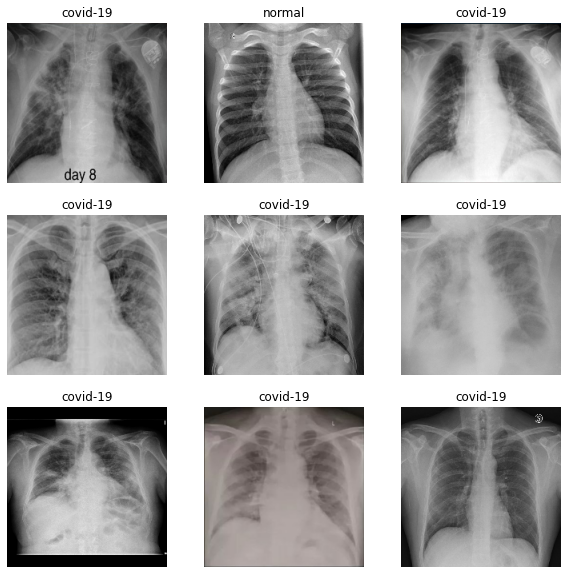

In [334]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [335]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


### Configuring the Dataset for Performance 

In [181]:
import cv2
from PIL import Image

In [224]:
SIZE = 150  # side for our image
dataset = []   #input holder for our images
label = []   # input holder for the label
label1 = []


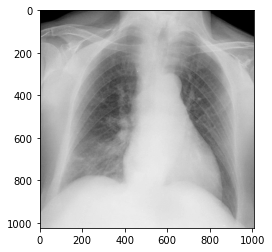

In [192]:

CATEGORIES = ["Covid-19", "Normal"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(data_loc,category)  # create path to covid-19 and normal samples
    for img in os.listdir(path):  # iterate over each image per covid-19 and normal samples
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!


        break  # we just want one for now so break
    break  #...and one more!

In [190]:
print(img_array.shape)

(1024, 1007)


In [346]:
# covid_samples = os.listdir(data_loc + 'covid-19/')
# for i, image_name in enumerate(covid_samples):
#     if (image_name.split('.')[1] == '*'):
#         image = cv2.imread(data_loc + 'covid/' + image_name)
#         image = Image.fromarray(image, 'RGB').convert('L')
#         image = image.resize((SIZE, SIZE),)
#         dataset.append(np.array(image))
#         label1.append(0)

In [289]:
# print(label1)

In [342]:
# normal_samples = os.listdir(data_loc + 'normal/')
# for i, image_name in enumerate(normal_samples):
#     if (image_name.split('.')[1] == 'jpeg'):
#         image = cv2.imread(data_loc + 'normal/' + image_name)
#         image = Image.fromarray(image, 'RGB').convert('L')
#         image = image.resize((SIZE, SIZE))
#         dataset.append(np.array(image))
#         label.append(1)

In [343]:
# dataset = np.array(dataset)
# label = np.array(label)

# print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


### Standardizing the Data

In [336]:
normalization = layers.Rescaling(1./255)

In [337]:
normalized = train.map(lambda x, y: (normalization(x), y)) # making the input layer smaller
image_batch, labels_batch = next(iter(normalized))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


### Create the Model

In [338]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [299]:
# model = Sequential([
#                     layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#                     layers.Conv2D(64,(3,3),input_shape=(img_height,img_width,3), activation='relu'),
#                     layers.MaxPooling2D(2,2),
#                     layers.Dropout(0.2),
#                     layers.Conv2D(128,(3,3), activation='relu'),
#                     layers.MaxPooling2D(2,2),
#                     layers.Dropout(0.2),
#                     layers.Flatten(),
#                     layers.Dense(512, activation='relu'),
#                     layers.Dropout(0.2),
#                     layers.Dense(10, activation='relu'),
#                     layers.Dropout(0.2),
#                     layers.Dense(1, activation='sigmoid')
# ])

In [329]:
# model.summary()

In [302]:
# opt = Adam(learning_rate=0.001)
# model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [310]:
# num_train_img=len(class_names)
# num_test_img=40

In [330]:
# history = model.fit(
#     train,
#     steps_per_epoch= 1,
#     validation_data=validation,
#     validation_steps=1,
#     epochs=10,
#     #callbacks=[EarlyStoppingCallback()]
   
# )

### Compile the Model

In [339]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model Summary

In [340]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 100, 100, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 50, 50, 64)      

### Train the Model

In [282]:
epochs=10

history = model.fit(
  train,
  validation_data=validation,
  epochs=epochs
)

Epoch 1/10
5/5 [==============================] - 6s 631ms/step - loss: 0.9874 - accuracy: 0.5486 - val_loss: 0.4730 - val_accuracy: 0.6875
Epoch 2/10
5/5 [==============================] - 4s 581ms/step - loss: 0.4631 - accuracy: 0.8194 - val_loss: 0.3214 - val_accuracy: 0.9375
Epoch 3/10
5/5 [==============================] - 4s 567ms/step - loss: 0.2132 - accuracy: 0.9653 - val_loss: 0.1941 - val_accuracy: 0.9375
Epoch 4/10
5/5 [==============================] - 4s 577ms/step - loss: 0.1017 - accuracy: 0.9722 - val_loss: 0.2220 - val_accuracy: 0.9375
Epoch 5/10
5/5 [==============================] - 4s 595ms/step - loss: 0.0614 - accuracy: 0.9722 - val_loss: 0.2330 - val_accuracy: 0.9375
Epoch 6/10
5/5 [==============================] - 5s 596ms/step - loss: 0.0379 - accuracy: 0.9792 - val_loss: 0.2991 - val_accuracy: 0.9375
Epoch 7/10
5/5 [==============================] - 6s 969ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.2421 - val_accuracy: 0.9375
Epoch 8/10
5/5 [====

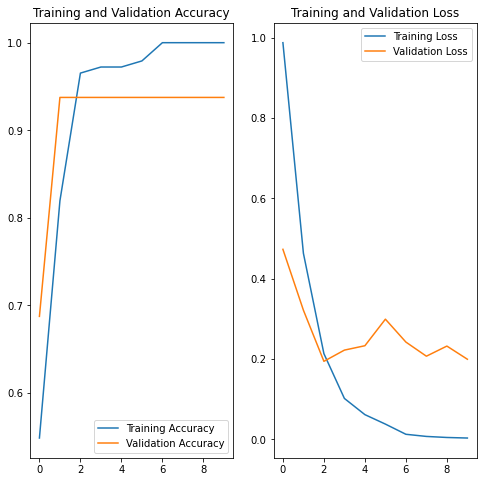

In [286]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation

In [290]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

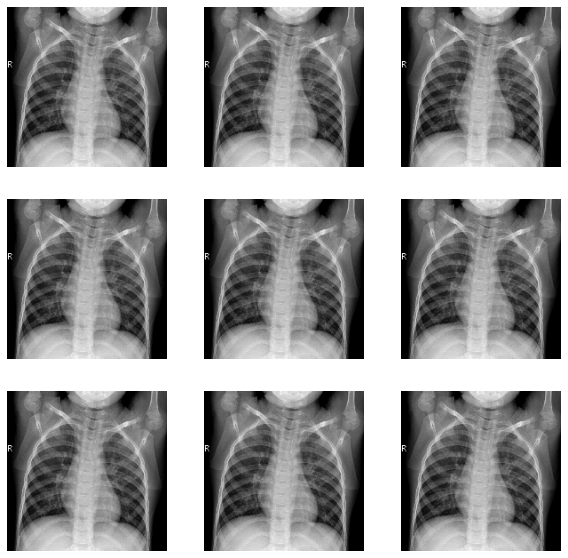

In [292]:
plt.figure(figsize=(10, 10))
for images, _ in train.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

We will Data augmentation to retrain our model to avoid overfitting problems.

### Dropout

In [324]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])

In [325]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [322]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                 

In [326]:
epochs = 15

history = model.fit(
  train,
  validation_data=validation,
  epochs=epochs
)

Epoch 1/15
5/5 [==============================] - 7s 728ms/step - loss: 1.3833 - accuracy: 0.4306 - val_loss: 0.7476 - val_accuracy: 0.3750
Epoch 2/15
5/5 [==============================] - 5s 664ms/step - loss: 0.6463 - accuracy: 0.6111 - val_loss: 0.5836 - val_accuracy: 0.6250
Epoch 3/15
5/5 [==============================] - 5s 677ms/step - loss: 0.6373 - accuracy: 0.5278 - val_loss: 0.5140 - val_accuracy: 0.7500
Epoch 4/15
5/5 [==============================] - 6s 828ms/step - loss: 0.5272 - accuracy: 0.8472 - val_loss: 0.3693 - val_accuracy: 0.8125
Epoch 5/15
5/5 [==============================] - 6s 805ms/step - loss: 0.3546 - accuracy: 0.9167 - val_loss: 0.3269 - val_accuracy: 0.8750
Epoch 6/15
5/5 [==============================] - 5s 671ms/step - loss: 0.2674 - accuracy: 0.9167 - val_loss: 0.3981 - val_accuracy: 0.8750
Epoch 7/15
5/5 [==============================] - 6s 894ms/step - loss: 0.1902 - accuracy: 0.9097 - val_loss: 0.4584 - val_accuracy: 0.8125
Epoch 8/15
5/5 [====

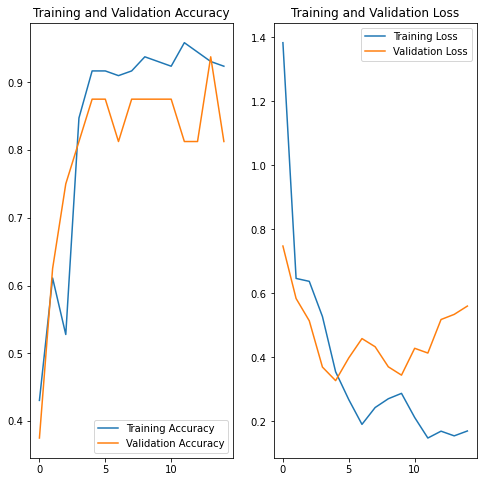

In [327]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Test Data Prediction

In [328]:
os. getcwd() 

'/Users/mclean/Documents/Exercise_Files/Dataset'

In [ ]:
Data_loc = ''
test_data = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)